# Data processing

In [1]:
# Import necessary libraries
import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For plotting
import seaborn as sns  # For enhanced data visualization
import math  # For mathematical operations
import statsmodels.api as sm  # For statistical modeling and analysis

# Specific modules/tools from statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor  # For variance inflation factor calculation
from statsmodels.tools.tools import add_constant  # To add a constant to a dataset
from statsmodels.tsa.stattools import acf  # For autocorrelation function

# Additional functions from scipy.stats
from scipy.stats import zscore, skew  # For z-score calculation and skewness

# Modules for data preprocessing and model building from scikit-learn
from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets
from sklearn.preprocessing import StandardScaler  # For feature scaling
from sklearn.feature_selection import f_regression  # For feature selection using F-regression
from sklearn.linear_model import LinearRegression, Lasso, Ridge  # For different types of regression models
from sklearn.svm import SVR  # For Support Vector Regression
from xgboost import XGBRegressor  # For XGBoost regressor

# Evaluation metrics from scikit-learn
from sklearn.metrics import r2_score  # For R-squared score calculation

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Read the data from the 'train.csv' file into a pandas DataFrame
data = pd.read_csv("train.csv")

# Set an option to display all columns in the DataFrame without truncation
pd.set_option('display.max_columns', None)

In [3]:
data.shape

(1460, 81)

In [4]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# Data cleaning

In [7]:
# Iterate through each column and its corresponding count of null values in the DataFrame
for i, j in data.isnull().sum().items():
    # Check if the percentage of null values for a column is greater than 0% and less than 20%
    if j / data.shape[0] * 100 > 0 and j / data.shape[0] * 100 < 20:
        # Print the column name and the percentage of null values rounded to 2 decimal places
        print(f"{i} - {round(j / data.shape[0] * 100, 2)}%")

LotFrontage - 17.74%
MasVnrArea - 0.55%
BsmtQual - 2.53%
BsmtCond - 2.53%
BsmtExposure - 2.6%
BsmtFinType1 - 2.53%
BsmtFinType2 - 2.6%
Electrical - 0.07%
GarageType - 5.55%
GarageYrBlt - 5.55%
GarageFinish - 5.55%
GarageQual - 5.55%
GarageCond - 5.55%


In [8]:
# Filling missing values in 'MasVnrArea' column with the mean value of 'MasVnrArea'
data['MasVnrArea'] = data['MasVnrArea'].fillna(data['MasVnrArea'].mean())

# Filling missing values in 'LotFrontage' column with the mean value of 'LotFrontage'
data['LotFrontage'] = data['LotFrontage'].fillna(data['LotFrontage'].mean())

# Filling missing values in certain basement-related columns with "No Basement"
data['BsmtQual'] = data['BsmtQual'].fillna("No Basement")
data['BsmtCond'] = data['BsmtCond'].fillna("No Basement")
data['BsmtExposure'] = data['BsmtExposure'].fillna("No Basement")
data['BsmtFinType1'] = data['BsmtFinType1'].fillna("No Basement")
data['BsmtFinType2'] = data['BsmtFinType2'].fillna("No Basement")

# Filling missing values in 'Electrical' column with the mode (most frequent value) of 'Electrical'
data['Electrical'] = data['Electrical'].fillna(data['Electrical'].mode()[0])

# Filling missing values in certain garage-related columns with "No Garage"
data['GarageType'] = data['GarageType'].fillna("No Garage")
data['GarageYrBlt'] = data['GarageYrBlt'].fillna(data['GarageYrBlt'].mean())
data['GarageFinish'] = data['GarageFinish'].fillna("No Garage")
data['GarageQual'] = data['GarageQual'].fillna("No Garage")
data['GarageCond'] = data['GarageCond'].fillna("No Garage")

In [9]:
# Iterate through each column and its corresponding count of null values in the DataFrame
for i, j in data.isnull().sum().items():
    # Check if the percentage of null values for a column is greater than or equal to 20%
    if j / data.shape[0] * 100 >= 20:
        # Print the column name and the percentage of null values rounded to 2 decimal places
        print(f"{i} - {round(j / data.shape[0] * 100, 2)}%")

Alley - 93.77%
MasVnrType - 59.73%
FireplaceQu - 47.26%
PoolQC - 99.52%
Fence - 80.75%
MiscFeature - 96.3%


In [10]:
# Filling missing values in certain categorical columns with specific placeholders
data['Alley'] = data['Alley'].fillna("No Alley Access")
data['FireplaceQu'] = data['FireplaceQu'].fillna("No Fireplace")
data['PoolQC'] = data['PoolQC'].fillna("No Pool")
data['Fence'] = data['Fence'].fillna("No Fence")
data['MiscFeature'] = data['MiscFeature'].fillna("No Miscellaneous Feature")

# Dropping columns 'Id' and 'MasVnrType' from the DataFrame
data.drop(columns=['Id', 'MasVnrType'], inplace=True)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [12]:
# Get column names of categorical variables (excluding numerical columns)
categorical_columns = data.select_dtypes(exclude='number').columns.tolist()

# Get column names of numerical variables
numerical_columns = data.select_dtypes('number').columns.tolist()

# Find the intersection of categorical and numerical column names
intersection_list = list(set(categorical_columns).intersection(numerical_columns))

# Print the list of columns that exist as both categorical and numerical
print(intersection_list)

[]


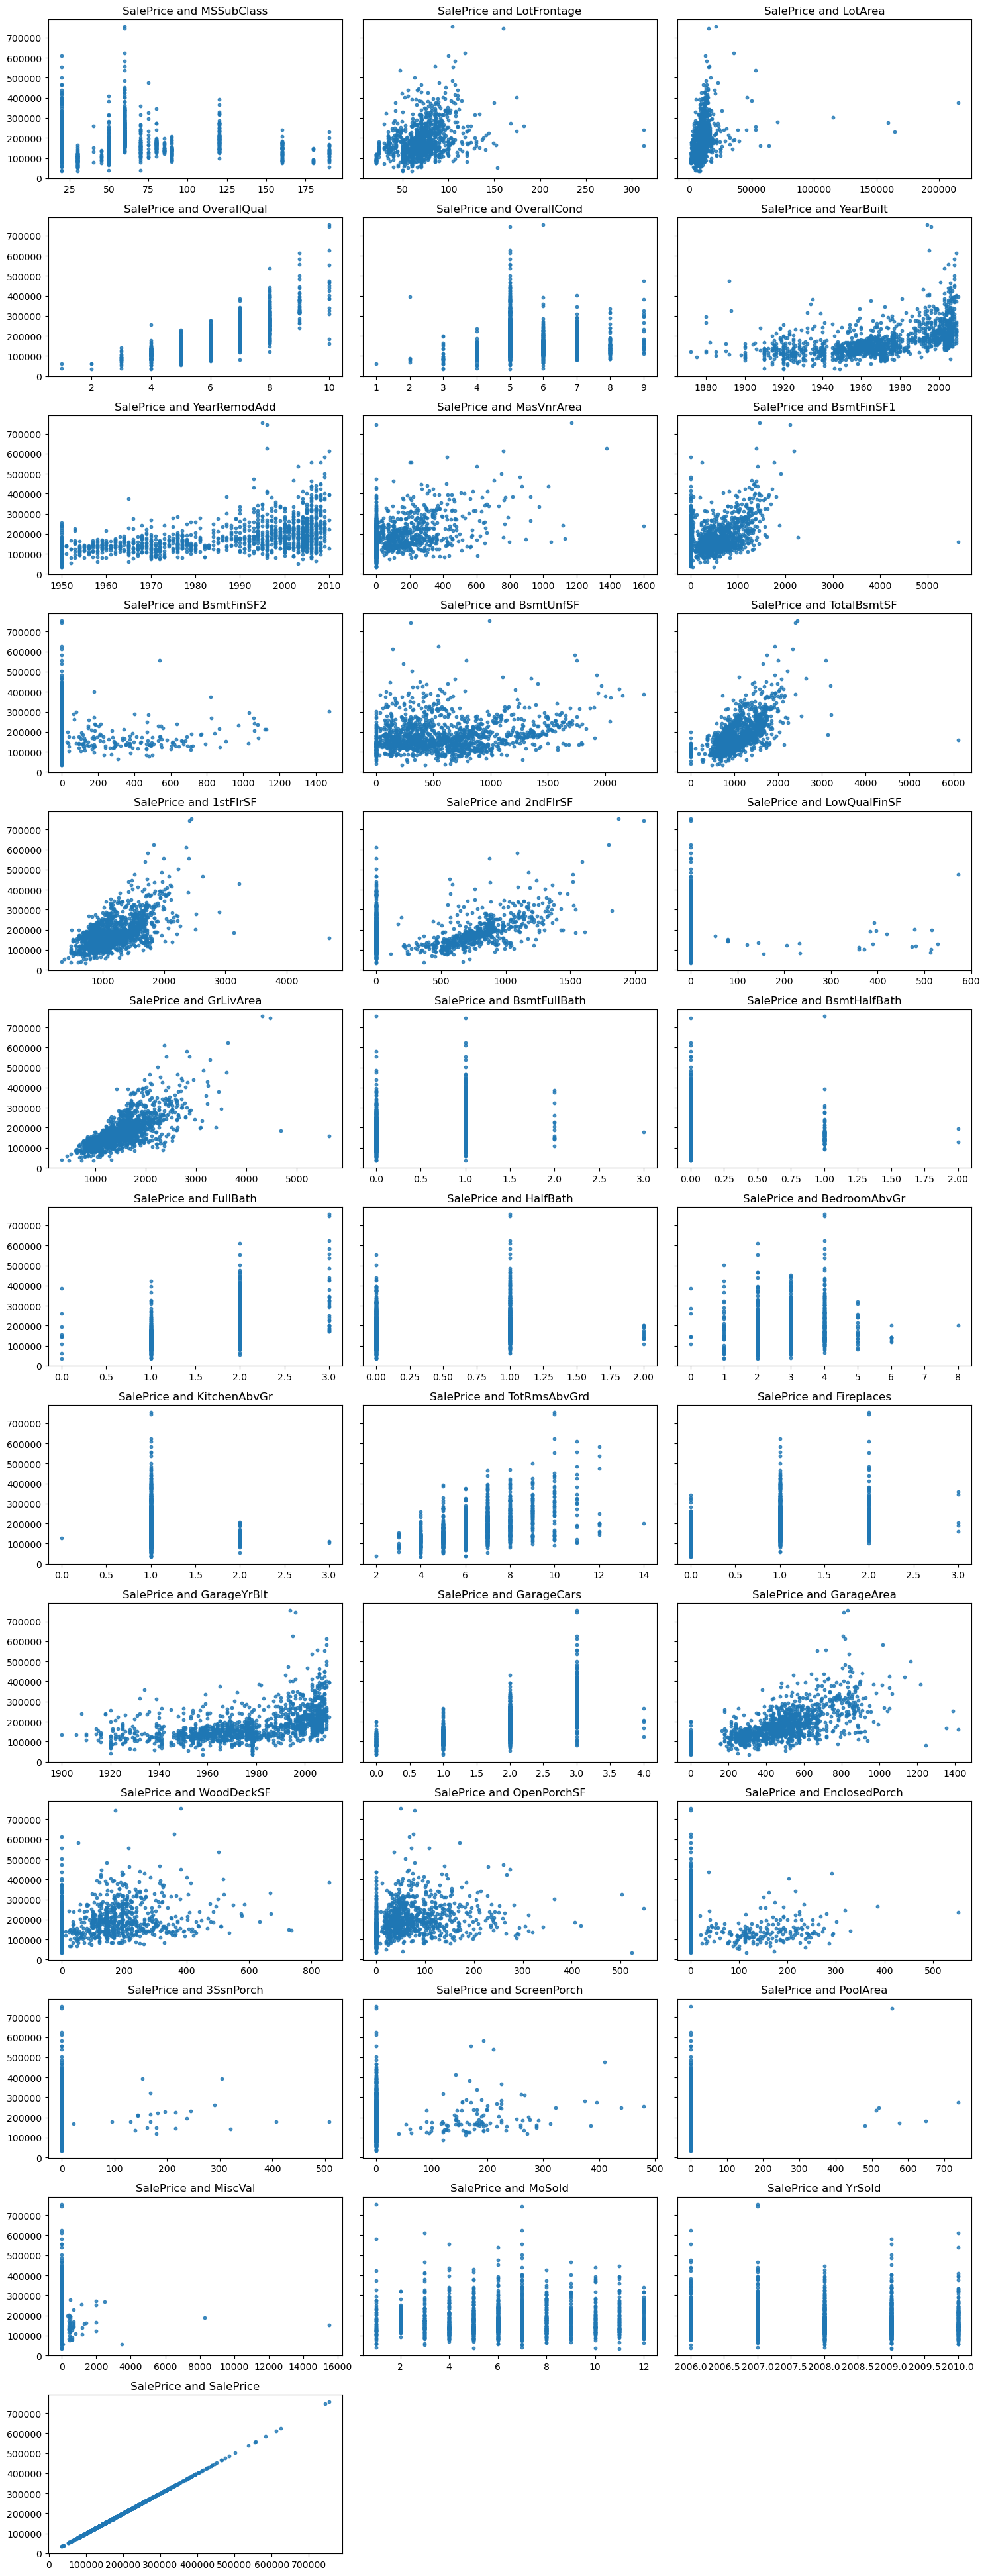

In [13]:
# Calculate the number of numerical columns
num_cols = len(numerical_columns)

# Calculate the number of rows needed for subplots (3 columns per row)
num_rows = (num_cols - 1) // 3 + 1  

# Create a figure and axes for subplots, share Y-axis, and set the figure size
fig, axes = plt.subplots(num_rows, 3, sharey=True, figsize=(15, num_rows * 3))

# Iterate through each numerical column
for i, col in enumerate(numerical_columns):
    # Calculate the row and column index for the subplot
    row = i // 3
    col_idx = i % 3
    
    # Plot a scatter plot of the numerical column against 'SalePrice' in the corresponding subplot
    axes[row, col_idx].scatter(data[col], data['SalePrice'], alpha=0.8, s=10)
    
    # Set the title of the subplot
    axes[row, col_idx].set_title(f'SalePrice and {col}')

# If the last row doesn't have 3 columns, remove the extra empty subplots
if num_cols % 3 != 0:
    for j in range(num_cols % 3, 3):
        # Remove the excess subplot
        fig.delaxes(axes[num_rows - 1, j])

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

In [14]:
# Function to remove outliers from a specified column 'x' in the DataFrame 'data'
def remove_outlier(data, x):
    # Calculate the z-score for the specified column 'x' and create a new column with '_zscore' suffix
    data[f'{x}_zscore'] = np.abs((data[f'{x}'] - np.mean(data[f'{x}'])) / np.std(data[f'{x}']))
    
    # Remove rows where the z-score of column 'x' is greater than or equal to 3 (considered as outliers)
    data.drop(data[data[f'{x}_zscore'] >= 3].index, inplace=True)
    
    # Drop the z-score column created for this specific column 'x'
    data.drop(columns=[f'{x}_zscore'], inplace=True)

# Loop through each numerical column and remove outliers using the defined function 'remove_outlier'
for i in numerical_columns:
    remove_outlier(data, i)

In [15]:
# List of columns to be dropped from the DataFrame
columns_should_drop = ['MiscVal', 'PoolArea', 'ScreenPorch', '3SsnPorch', 'EnclosedPorch', 'KitchenAbvGr',
                       'BsmtHalfBath', 'LowQualFinSF', 'BsmtFinSF2']

# Drop the specified columns from the DataFrame 'data'
data.drop(columns=columns_should_drop, inplace=True)

# Update numerical_columns list by removing the dropped columns, if present
for i in columns_should_drop:
    if i in numerical_columns:
        numerical_columns.remove(i)

# Update categorical_columns list by removing the dropped columns, if present
for i in columns_should_drop:
    if i in categorical_columns:
        categorical_columns.remove(i)

In [16]:
# Drop specified columns from the DataFrame 'data'
data.drop(columns=['MasVnrArea', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtUnfSF', '2ndFlrSF', 'WoodDeckSF', 'OpenPorchSF'], inplace=True)

# Append specific columns to the categorical_columns list
[categorical_columns.append(i) for i in ['MSSubClass', 'OverallQual', 'OverallCond']]

# Remove specific columns from the numerical_columns list
[numerical_columns.remove(i) for i in ['MSSubClass', 'OverallQual', 'OverallCond','MasVnrArea', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtUnfSF', '2ndFlrSF', 'WoodDeckSF', 'OpenPorchSF']]

[None, None, None, None, None, None, None, None, None, None, None]

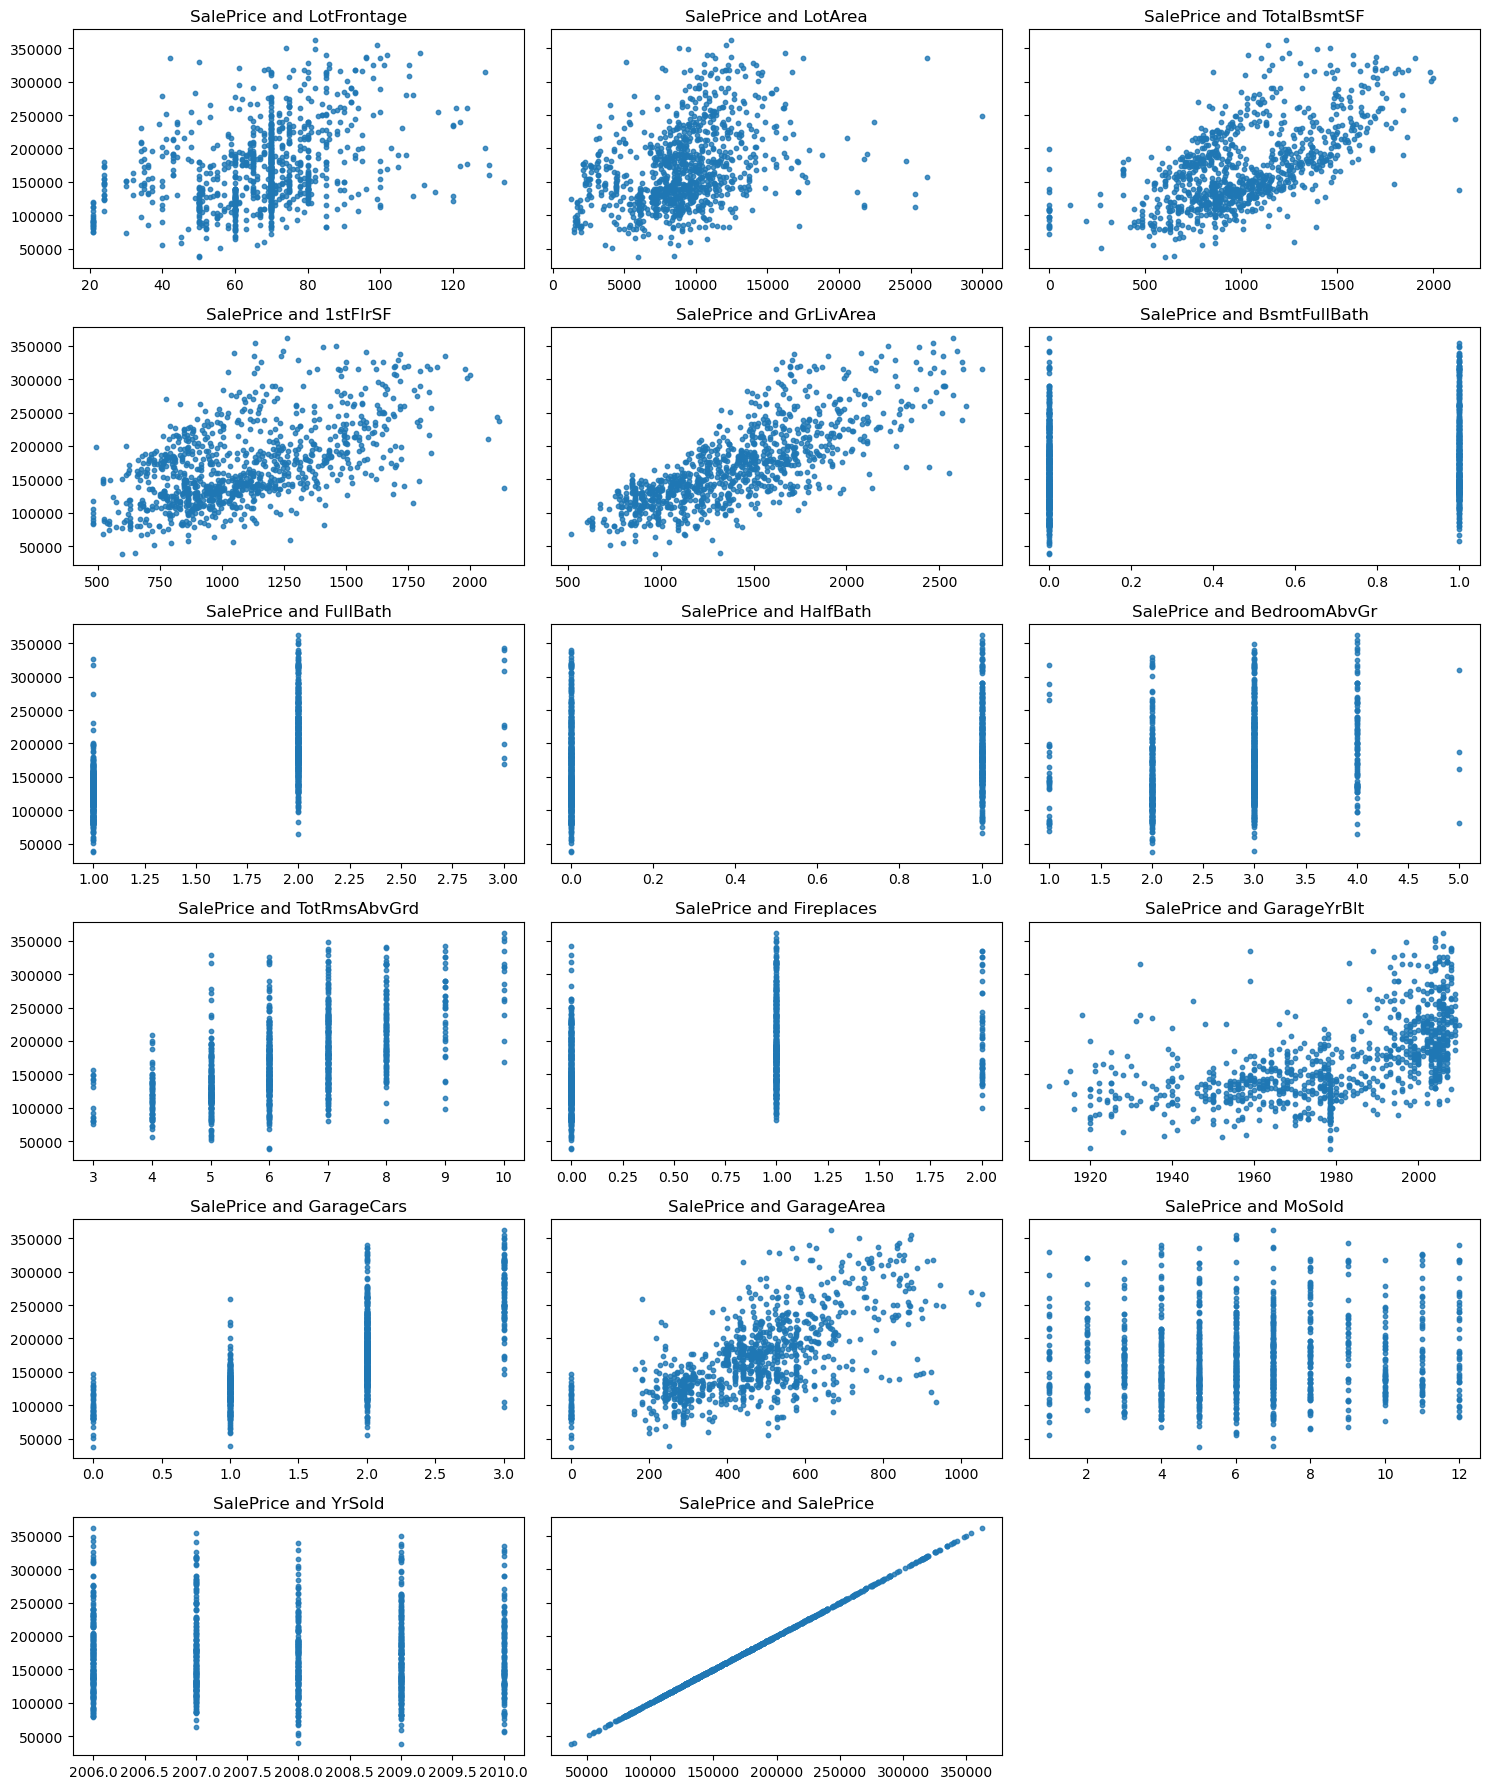

In [17]:
# Calculate the number of numerical columns
num_cols = len(numerical_columns)

# Calculate the number of rows needed for subplots (3 columns per row)
num_rows = (num_cols - 1) // 3 + 1  

# Create a figure and axes for subplots, share Y-axis, and set the figure size
fig, axes = plt.subplots(num_rows, 3, sharey=True, figsize=(15, num_rows * 3))

# Iterate through each numerical column
for i, col in enumerate(numerical_columns):
    # Calculate the row and column index for the subplot
    row = i // 3
    col_idx = i % 3
    
    # Plot a scatter plot of the numerical column against 'SalePrice' in the corresponding subplot
    axes[row, col_idx].scatter(data[col], data['SalePrice'], alpha=0.8, s=10)
    
    # Set the title of the subplot
    axes[row, col_idx].set_title(f'SalePrice and {col}')

# If the last row doesn't have 3 columns, remove the extra empty subplots
if num_cols % 3 != 0:
    for j in range(num_cols % 3, 3):
        # Remove the excess subplot
        fig.delaxes(axes[num_rows - 1, j])

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

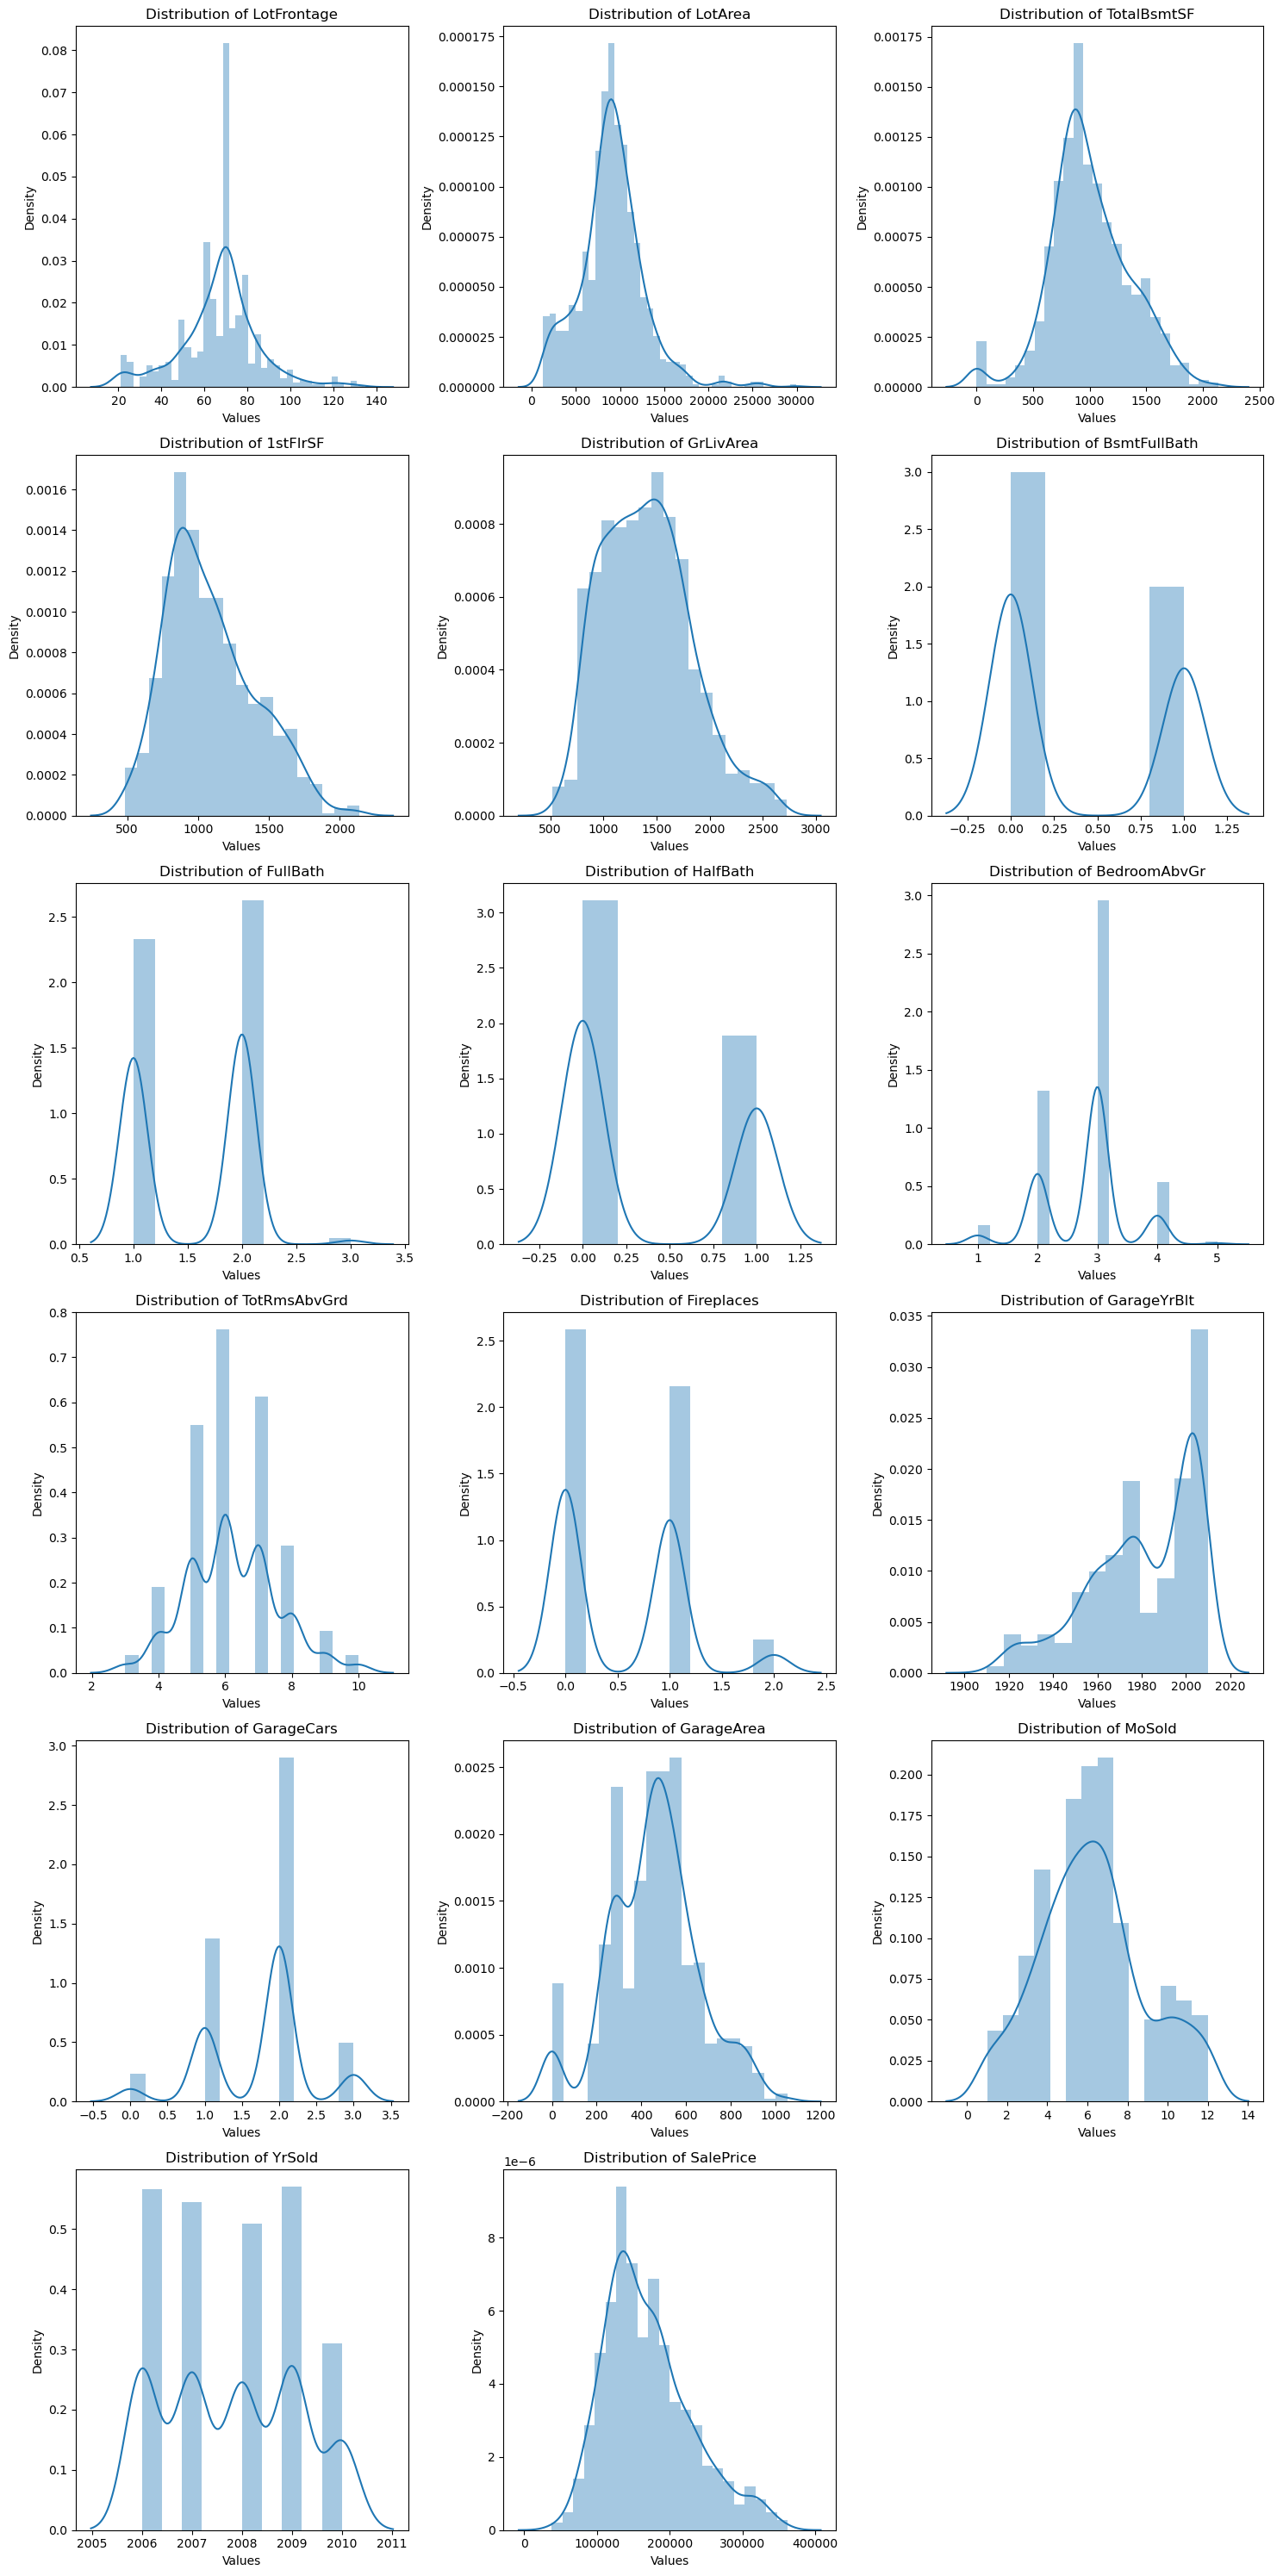

In [18]:
# Calculate the number of columns and rows for subplots
num_columns = 3  # Number of columns for subplots
num_rows = math.ceil(len(numerical_columns) / num_columns)  # Calculate the number of rows based on the number of numerical columns

# Create a figure and axes for subplots with specified dimensions
fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, num_rows * 5))

# Iterate through each numerical column and create distribution plots
for i, column in enumerate(numerical_columns):
    row = i // num_columns  # Calculate the row index
    col = i % num_columns  # Calculate the column index
    ax = axes[row, col] if num_rows > 1 else axes[col]  # Determine the specific axis for the subplot
    sns.distplot(data[column], ax=ax)  # Plot the distribution using Seaborn's distplot
    ax.set_title(f'Distribution of {column}')  # Set subplot title
    ax.set_xlabel('Values')  # Set label for x-axis
    ax.set_ylabel('Density')  # Set label for y-axis

# Remove excess subplots that exceed the number of numerical columns
for i in range(len(numerical_columns), num_rows * num_columns):
    row = i // num_columns  # Calculate the row index
    col = i % num_columns  # Calculate the column index
    if num_rows > 1:
        fig.delaxes(axes[row, col])  # Delete the excess subplot if there are multiple rows
    else:
        fig.delaxes(axes[col])  # Delete the excess subplot if there's only one row

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

In [19]:
# Initialize an empty dictionary to store skewness values for numerical columns
skewness_values = {}

# Calculate skewness for each numerical column and store the values in the dictionary
for i in numerical_columns:
    skewness_values[i] = round(skew(data[i]), 1)  # Calculate skewness using scipy's skew function and round to one decimal place

# Print the skewness values for each numerical column
for i, j in skewness_values.items():
    print(f"Skewness of '{i}': {j}")  # Display the name of the column and its corresponding skewness value

Skewness of 'LotFrontage': -0.0
Skewness of 'LotArea': 0.8
Skewness of 'TotalBsmtSF': 0.1
Skewness of '1stFlrSF': 0.6
Skewness of 'GrLivArea': 0.5
Skewness of 'BsmtFullBath': 0.4
Skewness of 'FullBath': 0.0
Skewness of 'HalfBath': 0.5
Skewness of 'BedroomAbvGr': -0.2
Skewness of 'TotRmsAbvGrd': 0.2
Skewness of 'Fireplaces': 0.6
Skewness of 'GarageYrBlt': -0.7
Skewness of 'GarageCars': -0.4
Skewness of 'GarageArea': -0.0
Skewness of 'MoSold': 0.3
Skewness of 'YrSold': 0.1
Skewness of 'SalePrice': 0.8


<Axes: >

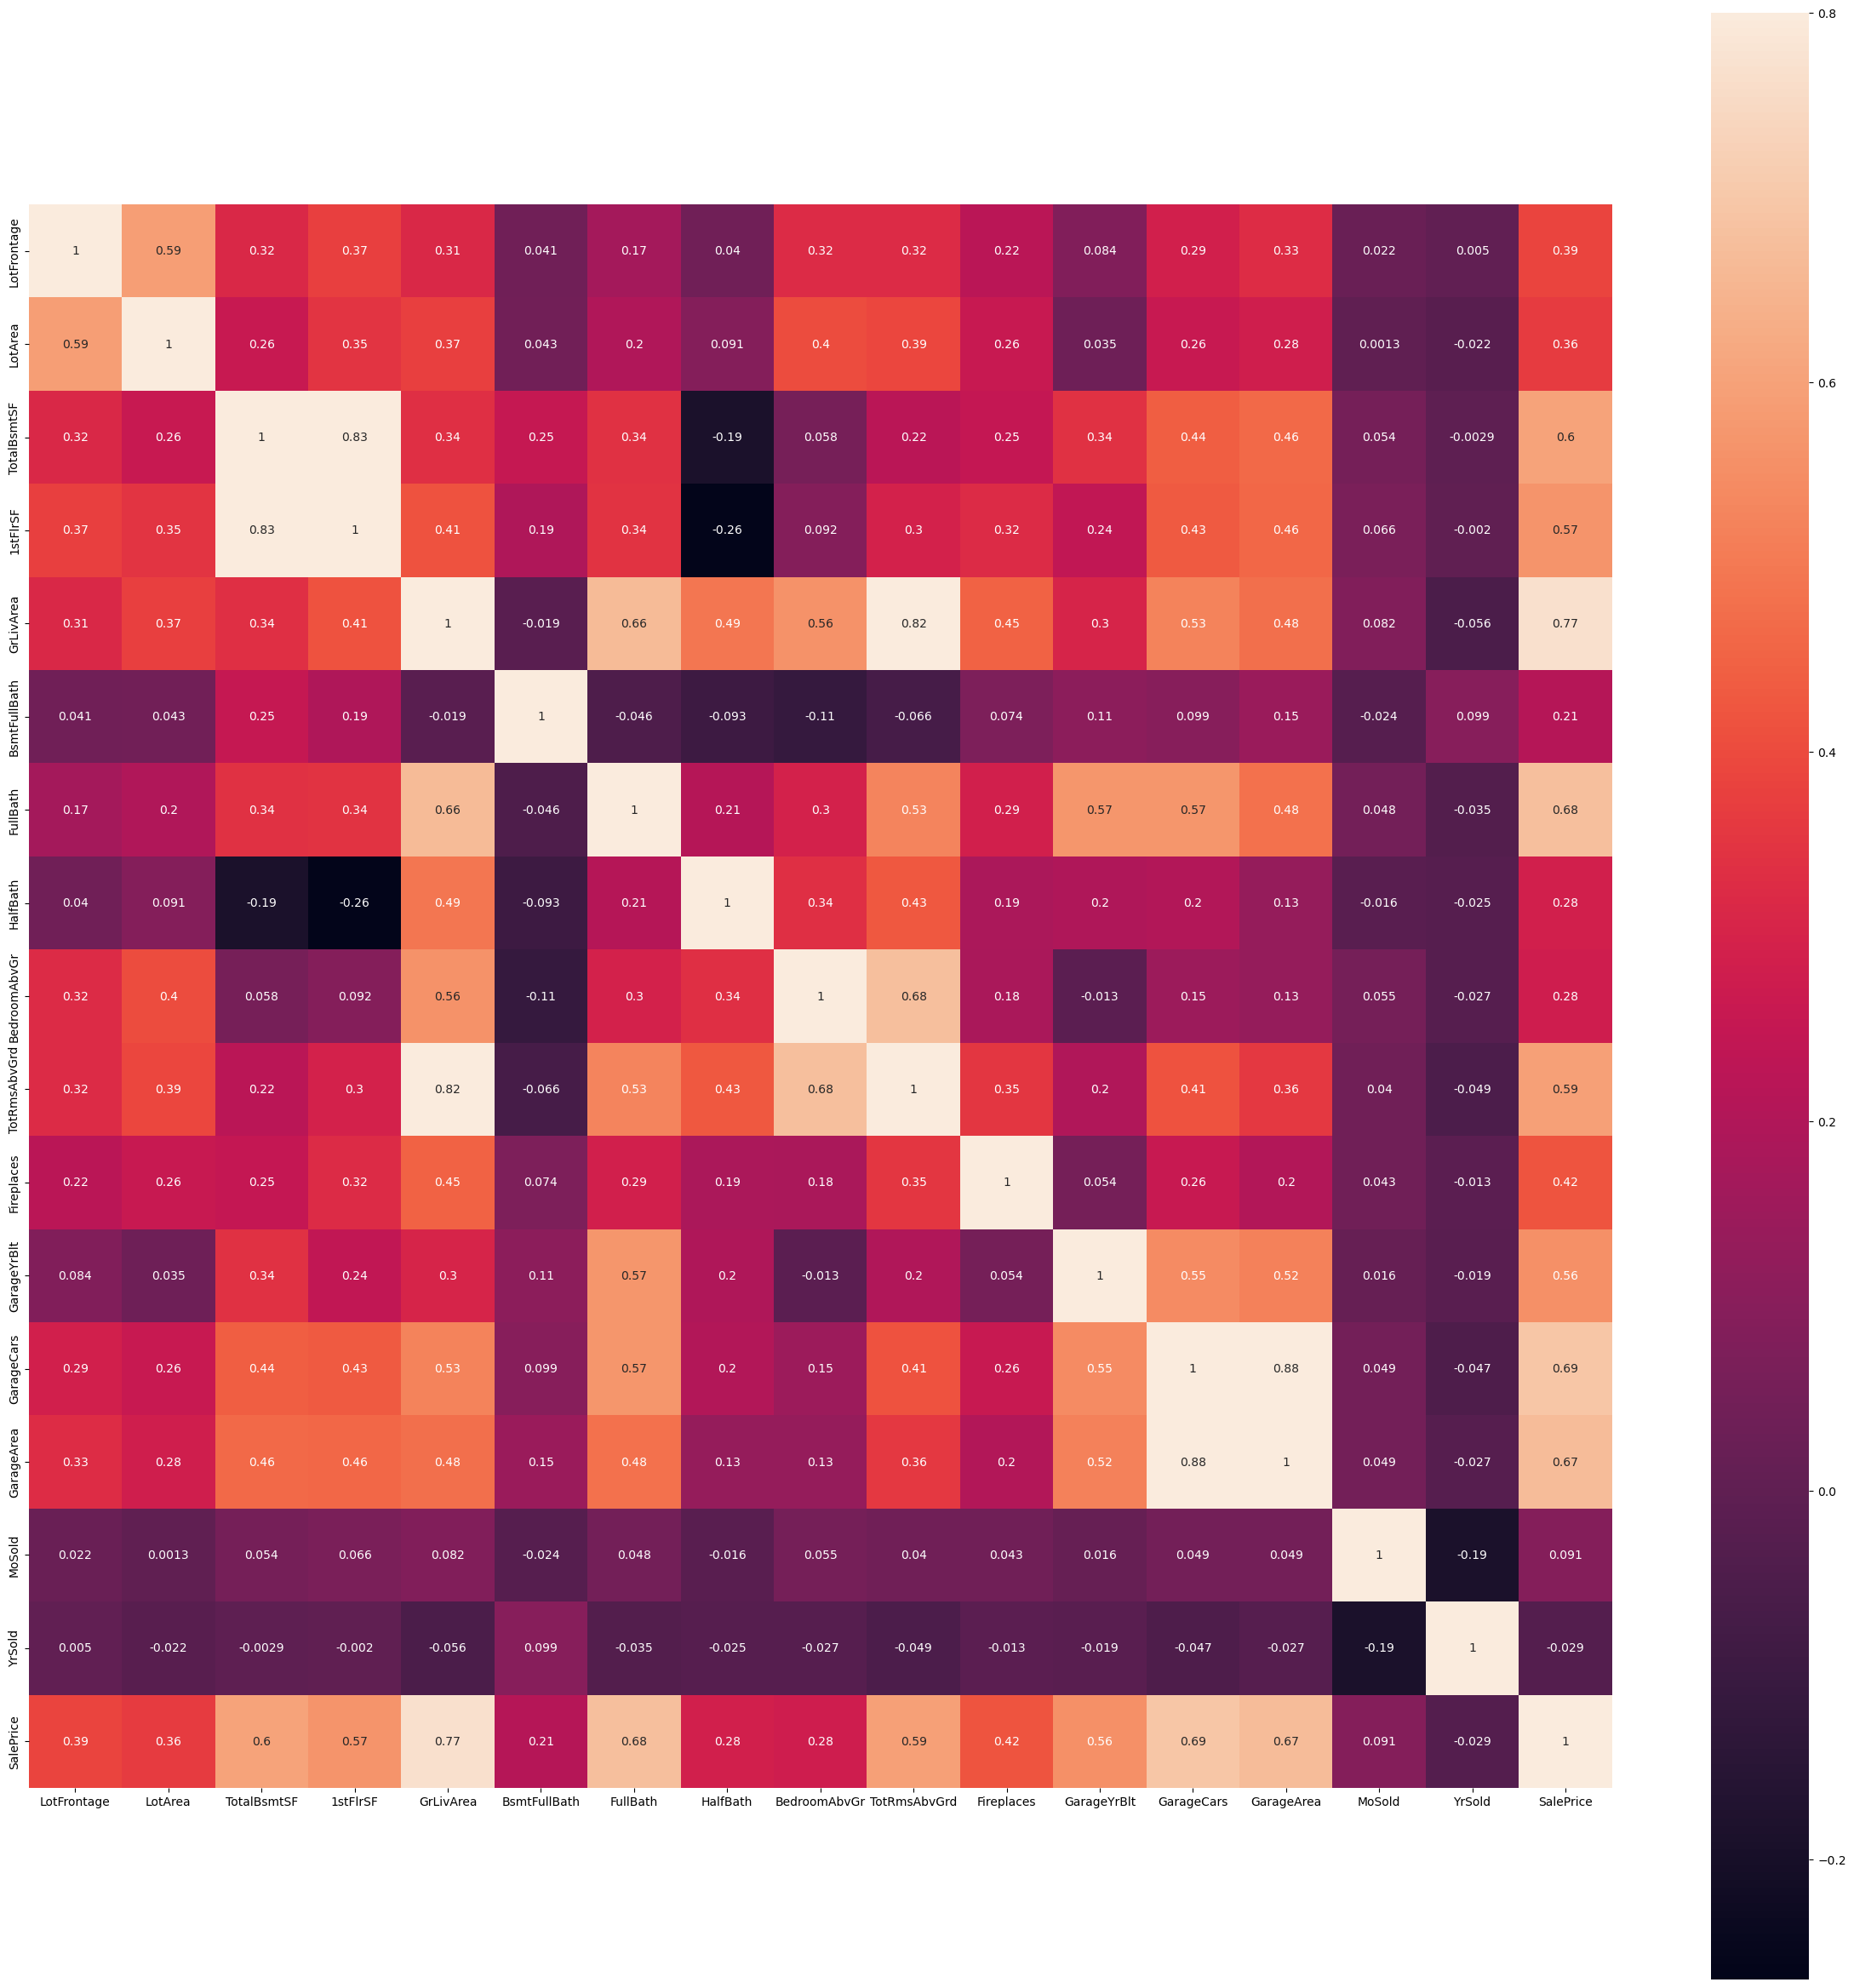

In [20]:
# Set the figure size for the heatmap
plt.figure(figsize=(30, 30))

# Create a heatmap to display the correlation matrix of numerical columns
sns.heatmap(data[numerical_columns].corr(), vmax=0.8, annot=True, square=True)

In [21]:
# Add a constant to the numerical columns in 'data'
variables_with_constant = add_constant(data[numerical_columns])

# Create an empty DataFrame to store feature names and their corresponding VIF values
vif = pd.DataFrame()

# Assign the column names of the augmented dataset to the 'Features' column in the DataFrame
vif['Features'] = variables_with_constant.columns

# Calculate VIF for each feature in the augmented dataset
vif['VIF'] = [variance_inflation_factor(variables_with_constant.values, i) for i in range(variables_with_constant.shape[1])]

# Print the DataFrame displaying features and their corresponding VIF values
print(vif)

        Features           VIF
0          const  2.366785e+06
1    LotFrontage  1.740149e+00
2        LotArea  1.770990e+00
3    TotalBsmtSF  3.964850e+00
4       1stFlrSF  4.706946e+00
5      GrLivArea  7.610092e+00
6   BsmtFullBath  1.229101e+00
7       FullBath  2.892079e+00
8       HalfBath  2.333829e+00
9   BedroomAbvGr  2.288575e+00
10  TotRmsAbvGrd  3.983243e+00
11    Fireplaces  1.389140e+00
12   GarageYrBlt  2.230602e+00
13    GarageCars  5.379280e+00
14    GarageArea  5.000999e+00
15        MoSold  1.060838e+00
16        YrSold  1.052600e+00
17     SalePrice  6.250185e+00


In [22]:
# Filter columns with VIF greater than 10 from the 'vif' DataFrame and get the column names
columns_drop_VIF = vif[vif['VIF'] > 10]
columns_drop_VIF = columns_drop_VIF['Features'].tolist()[1:]  # Exclude the constant term

# Drop columns with high VIF from the DataFrame 'data'
data.drop(columns=columns_drop_VIF, inplace=True)

# Remove dropped columns from the numerical_columns list
for i in columns_drop_VIF:
    if i in numerical_columns:
        numerical_columns.remove(i)

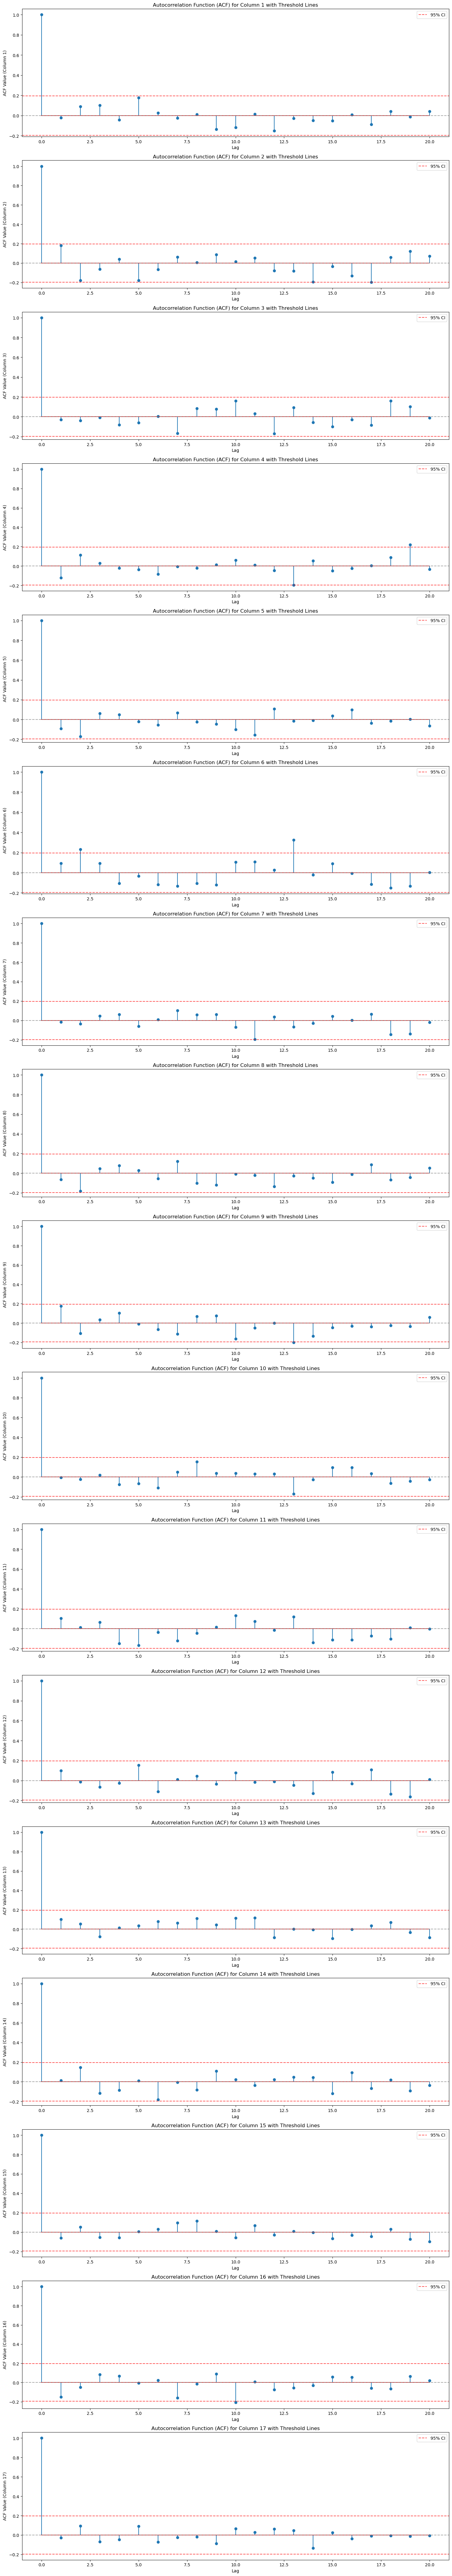

In [23]:
# Setting a seed for reproducibility
np.random.seed(0)

# Generating random data to simulate the same shape as the numerical columns in the original dataset 'data'
data_for_corr = np.random.randn(100, data[numerical_columns].shape[1])

# Calculating the confidence interval for ACF plots
num_obs = len(data_for_corr)
conf_int = 1.96 / np.sqrt(num_obs)

# Setting up the figure size based on the number of columns in 'data_for_corr'
num_cols = data_for_corr.shape[1]
plt.figure(figsize=(15, 5 * num_cols))

# Iterating through each column in 'data_for_corr' to plot the ACF
for i in range(num_cols):
    column_data = data_for_corr[:, i]  # Selecting data for each column
    acf_values = acf(column_data, nlags=20)  # Calculating autocorrelation function values with a lag of 20
    
    # Creating subplots for each column's ACF
    plt.subplot(num_cols, 1, i+1)
    plt.stem(acf_values)  # Plotting the ACF values
    plt.xlabel('Lag')
    plt.ylabel(f'ACF Value (Column {i+1})')
    plt.title(f'Autocorrelation Function (ACF) for Column {i+1} with Threshold Lines')

    # Plotting threshold lines for the 95% confidence interval
    plt.axhline(y=0, linestyle='--', color='gray', alpha=0.7)  # Zero line
    plt.axhline(y=conf_int, linestyle='--', color='red', alpha=0.7, label='95% CI')  # Upper threshold
    plt.axhline(y=-conf_int, linestyle='--', color='red', alpha=0.7)  # Lower threshold

    plt.legend()  # Show the legend

plt.tight_layout()
plt.show()

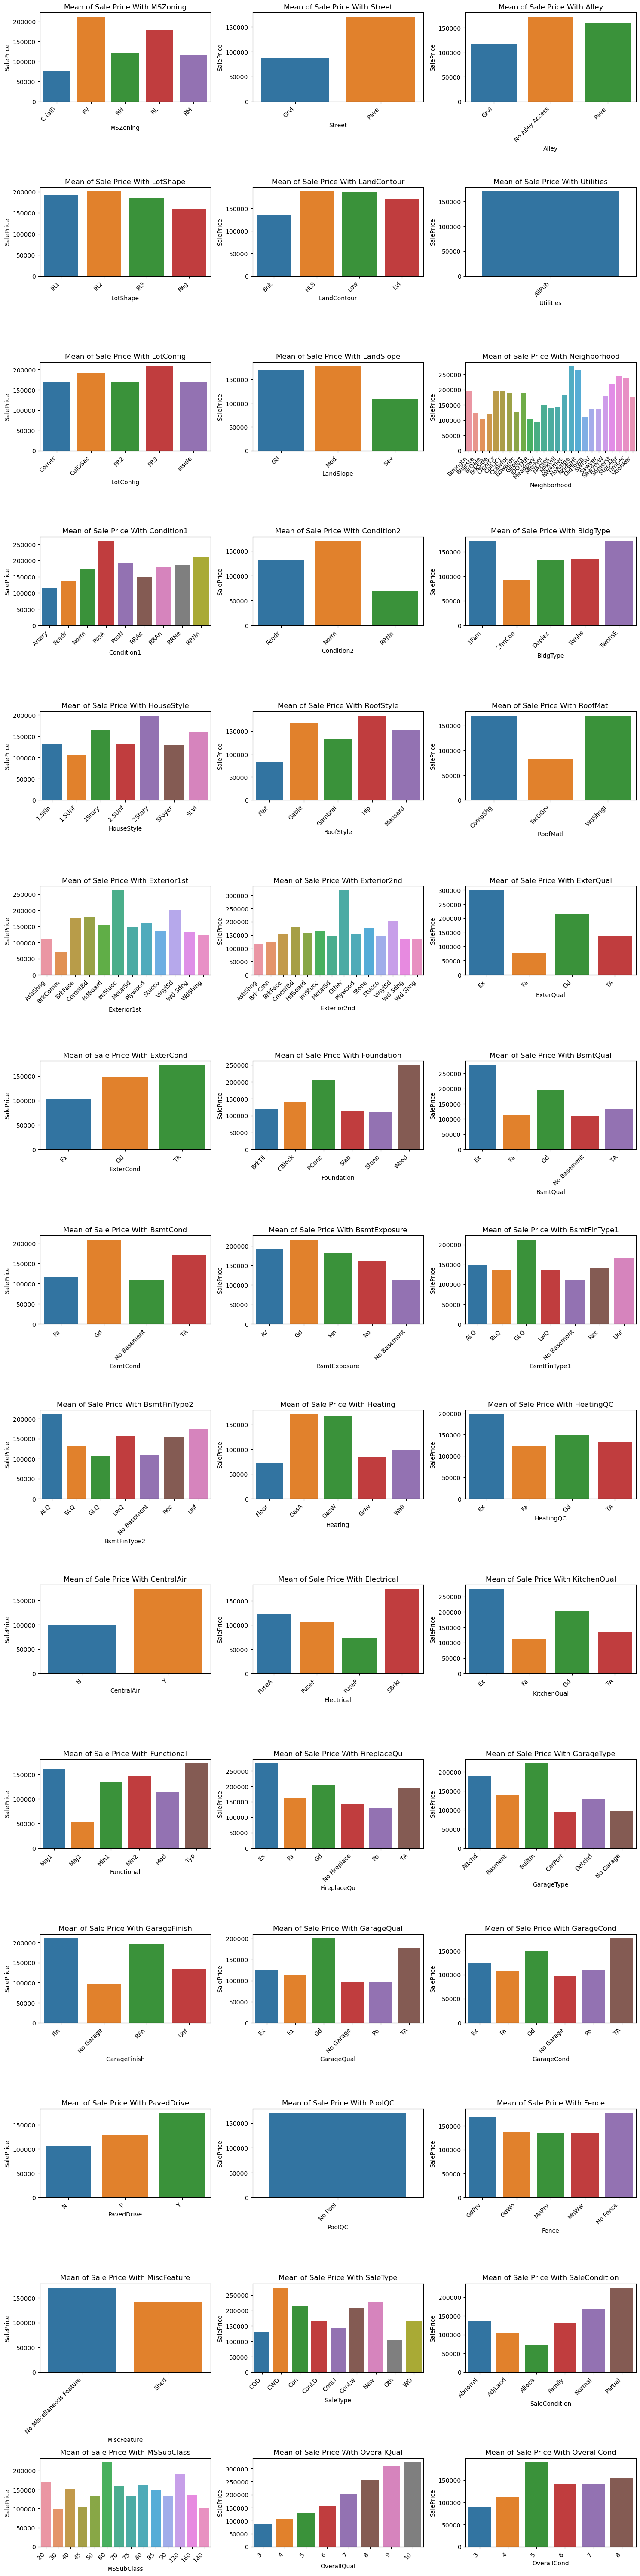

In [24]:
# Define a function to plot mean sale price for a categorical column
def plot_categorical_column_with_price(x, ax):
    mean = data.groupby(x)['SalePrice'].mean()  # Calculate mean sale price per category
    sns.barplot(x=mean.index, y=mean.values, ax=ax)  # Create a bar plot
    ax.set_xlabel(x)
    ax.set_ylabel('SalePrice')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')  # Rotate x-axis labels for better readability
    ax.set_title(f'Mean of Sale Price With {x}')  # Set plot title

# Calculate number of rows needed for subplots
num_columns = 3 
num_rows = -(-len(categorical_columns) // num_columns)  # Calculate number of rows based on the number of categorical columns

# Create a figure and axes for subplots with specified dimensions
fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, num_rows * 4))

# Iterate through each categorical column and create a subplot showing mean sale price
for i, column in enumerate(categorical_columns):
    row = i // num_columns
    col = i % num_columns
    ax = axes[row, col] if num_rows > 1 else axes[col]
    plot_categorical_column_with_price(column, ax)

# Remove excess subplots that exceed the number of categorical columns
for i in range(len(categorical_columns), num_rows * num_columns):
    row = i // num_columns
    col = i % num_columns
    if num_rows > 1:
        fig.delaxes(axes[row, col])
    else:
        fig.delaxes(axes[col])

plt.tight_layout()  # Adjust layout
plt.show()  # Display the plot

In [25]:
# Drop specified columns from the DataFrame 'data'
data.drop(columns=['Utilities', 'PoolQC'], inplace=True)

# Remove the specified columns from the categorical_columns list
[categorical_columns.remove(i) for i in ['Utilities', 'PoolQC']]

[None, None]

In [26]:
# Iterate through each column in the list of categorical columns
for i in categorical_columns:
    try:
        # Try to convert the column to numeric type and then to string
        data[i] = pd.to_numeric(data[i]).astype(str)
    except ValueError:
        # If conversion to numeric fails (due to non-numeric values), handle the ValueError
        pass  # Continue to the next column without making any changes

In [27]:
# Convert categorical columns to one-hot encoded representation
categorical_data = pd.get_dummies(data[categorical_columns], dtype=float, drop_first=True)

# Select numerical columns
numerical_data = data[numerical_columns]

# Concatenate one-hot encoded categorical data and numerical data along columns
data_for_model = pd.concat([categorical_data, numerical_data], axis=1)

In [28]:
# Drop the 'SalePrice' column to define features (X) and the 'SalePrice' column as the target variable (y)
X = data_for_model.drop(columns='SalePrice')
y = data_for_model['SalePrice']

# Perform F-test and retrieve p-values for each feature
p_values = f_regression(X, y)[1]
feature_names = X.columns.tolist()

# Create a DataFrame 'reg_summary' containing feature names and their respective p-values
reg_summary = pd.DataFrame({'Features': feature_names, 'p-values': p_values})

# Iteratively perform feature selection based on p-values until no p-value is greater than 0.05
while reg_summary['p-values'].max() > 0.05:
    # Find the index of the feature with the maximum p-value
    max_p_index = reg_summary['p-values'].idxmax()
    feature_to_drop = reg_summary.loc[max_p_index, 'Features']  # Identify the feature with the highest p-value
    
    # Drop the feature with the maximum p-value from the feature set (X)
    X = X.drop(columns=[feature_to_drop])
    
    # Perform F-test again after dropping the feature and update p-values and feature names
    p_values = f_regression(X, y)[1]
    feature_names = X.columns.tolist()
    
    # Update reg_summary DataFrame with the new set of features and their p-values
    reg_summary = pd.DataFrame({'Features': feature_names, 'p-values': p_values})

# Display the final summary of features and their p-values after feature selection
reg_summary

,Features,p-values
0,MSZoning_FV,1.056445e-07
1,MSZoning_RH,1.412535e-02
2,MSZoning_RL,7.278711e-17
3,MSZoning_RM,1.478469e-33
4,Alley_No Alley Access,1.414560e-05
...,...,...
146,Fireplaces,3.749122e-42
147,GarageYrBlt,2.080847e-80
148,GarageCars,1.070662e-139
149,GarageArea,8.736194e-126


In [29]:
# Extracting features (predictor variables) into a NumPy array
X = data_for_model[feature_names].iloc[:, :].values

# Extracting the target variable into a NumPy array
y = data_for_model.iloc[:, -1].values

In [30]:
# Splitting the dataset into training and testing sets for features and target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [31]:
# Create copies of the original training and test sets
X_train_nstd = X_train.copy()
X_test_nstd = X_test.copy()
y_train_nstd = y_train.copy()

# Initialize StandardScaler objects for features (sc_X) and target variable (sc_y)
sc_X = StandardScaler()
sc_y = StandardScaler()

# Scale specific columns of the training and test sets for features (from column 133 onwards)
X_train[:, 133:] = sc_X.fit_transform(X_train[:, 133:])
X_test[:, 133:] = sc_X.transform(X_test[:, 133:])

# Scale the target variable (y_train) using StandardScaler, reshaping for compatibility, and flattening the result
y_train = sc_y.fit_transform(y_train.reshape(-1, 1)).flatten()

In [32]:
# Instantiate a Linear Regression model
multi_lr = LinearRegression()

# Fit the Linear Regression model using the scaled training data
multi_lr.fit(X_train_nstd, y_train_nstd)

LinearRegression()

In [33]:
# Obtain predictions for both the training and test sets using the trained Linear Regression model
y_pred = multi_lr.predict(X_test_nstd)
y_train_pred = multi_lr.predict(X_train_nstd)

# Calculate R2 scores for the training and test sets
r2_lr_train = r2_score(y_train_nstd, y_train_pred)  # R2 score for the training set
r2_lr_test = r2_score(y_test, y_pred.reshape(-1, 1))  # R2 score for the test set

# Print the R2 scores
print("R2 Train Score:", r2_lr_train)
print("R2 Test Score:", r2_lr_test)

R2 Train Score: 0.9409145130386499
R2 Test Score: 0.9145290914198856


In [34]:
# Instantiate an SVR model with a linear kernel
svr = SVR(kernel='linear')

# Fit the SVR model using the training data
svr.fit(X_train, y_train)

SVR(kernel='linear')

In [35]:
# Obtain predictions for both the training and test sets using the trained SVR model
y_pred = svr.predict(X_test)
y_train_pred = svr.predict(X_train)

# Calculate R2 scores for the training and test sets
r2_svr_lr_train = r2_score(y_train, y_train_pred)  # R2 score for the training set
r2_svr_lr_test = r2_score(y_test, sc_y.inverse_transform(y_pred.reshape(-1, 1)))  # R2 score for the test set

# Print the R2 scores
print("R2 Train Score:", r2_svr_lr_train)
print("R2 Test Score:", r2_svr_lr_test)

R2 Train Score: 0.9364297877594232
R2 Test Score: 0.9204799610992911


In [36]:
# Instantiate an SVR model with an RBF kernel
svr = SVR(kernel='rbf')

# Fit the SVR model using the training data
svr.fit(X_train, y_train)

SVR()

In [37]:
# Obtain predictions for both the training and test sets using the trained SVR model
y_pred = svr.predict(X_test)
y_train_pred = svr.predict(X_train)

# Calculate R2 scores for the training and test sets
r2_svr_train = r2_score(y_train, y_train_pred)  # R2 score for the training set
r2_svr_test = r2_score(y_test, sc_y.inverse_transform(y_pred.reshape(-1, 1)))  # R2 score for the test set

# Print the R2 scores
print("R2 Train Score:", r2_svr_train)
print("R2 Test Score:", r2_svr_test)

R2 Train Score: 0.9616181897454392
R2 Test Score: 0.9103210877113864


In [38]:
# Instantiate a Ridge Regression model
ridge = Ridge()

# Fit the Ridge Regression model using the training data
ridge.fit(X_train, y_train)

Ridge()

In [39]:
# Obtain predictions for both the training and test sets using the trained Ridge Regression model
y_pred = ridge.predict(X_test)
y_train_pred = ridge.predict(X_train)

# Calculate R2 scores for the training and test sets
r2_ridge_train = r2_score(y_train, y_train_pred)  # R2 score for the training set
r2_ridge_test = r2_score(y_test, sc_y.inverse_transform(y_pred.reshape(-1, 1)))  # R2 score for the test set

# Print the R2 scores
print("R2 Train Score:", r2_ridge_train)
print("R2 Test Score:", r2_ridge_test)

R2 Train Score: 0.9392472511080004
R2 Test Score: 0.9190993783755349


In [40]:
# Instantiate a Lasso Regression model with alpha=0.001
lasso = Lasso(alpha=0.001)

# Fit the Lasso Regression model using the training data
lasso.fit(X_train, y_train)

Lasso(alpha=0.001)

In [41]:
# Obtain predictions for both the training and test sets using the trained Lasso Regression model
y_pred = lasso.predict(X_test)
y_train_pred = lasso.predict(X_train)

# Calculate R2 scores for the training and test sets
r2_lasso_train = r2_score(y_train, y_train_pred)  # R2 score for the training set
r2_lasso_test = r2_score(y_test, sc_y.inverse_transform(y_pred.reshape(-1, 1)))  # R2 score for the test set

# Print the R2 scores
print("R2 Train Score:", r2_lasso_train)
print("R2 Test Score:", r2_lasso_test)

R2 Train Score: 0.9331661423121504
R2 Test Score: 0.9222050695419115


In [42]:
# Instantiate an XGBoost Regressor model with specific hyperparameters
xgb = XGBRegressor(learning_rate=0.2, gamma=0.2)

# Fit the XGBoost Regressor model using the training data
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.2, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [43]:
# Obtain predictions for both the training and test sets using the trained XGBoost Regressor model
y_pred = xgb.predict(X_test)
y_train_pred = xgb.predict(X_train)

# Calculate R2 scores for the training and test sets
r2_xgb_train = r2_score(y_train, y_train_pred)  # R2 score for the training set
r2_xgb_test = r2_score(y_test, sc_y.inverse_transform(y_pred.reshape(-1, 1)))  # R2 score for the test set

# Print the R2 scores
print("R2 Train Score:", r2_xgb_train)
print("R2 Test Score:", r2_xgb_test)

R2 Train Score: 0.9759575957006326
R2 Test Score: 0.8630881674642874
